<a href="https://colab.research.google.com/github/wildcat26/Deep-Learning-Assignments/blob/master/v1_CNN_DL_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Will see if normalization improves accuracy
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [0]:
validation_images = train_images[:10000]
validation_labels = train_labels[:10000]

train_images = train_images[10000:]
train_labels = train_labels[10000:]

# print (np.shape(validation_images))
# print (np.shape(validation_labels))
# print (np.shape(train_labels))
# print (np.shape(train_images))


In [0]:
# dataset is already shuffled randomly
# Kernel depth is the same as input image depth

[1]


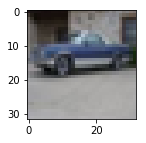

In [5]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[0])
print(train_labels[0])

plt.show()

# seems like a car

In [0]:
def plot_accuracy (history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [19]:
model_1 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_1.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))

# model_1.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_1.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

model_1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [20]:
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_1 = os.path.dirname("training_1/training_1.ckpt")
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_1, save_weights_only=True)

history_1 = model_1.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 80s 2ms/sample - loss: 1.5804 - acc: 0.4278 - val_loss: 1.2967 - val_acc: 0.5405
Epoch 2/10
40000/40000 [==============================] - 79s 2ms/sample - loss: 1.2136 - acc: 0.5754 - val_loss: 1.1635 - val_acc: 0.5908
Epoch 3/10
40000/40000 [==============================] - 79s 2ms/sample - loss: 1.0710 - acc: 0.6254 - val_loss: 1.0804 - val_acc: 0.6292
Epoch 4/10
40000/40000 [==============================] - 80s 2ms/sample - loss: 0.9782 - acc: 0.6576 - val_loss: 1.0148 - val_acc: 0.6431
Epoch 5/10
40000/40000 [==============================] - 79s 2ms/sample - loss: 0.9088 - acc: 0.6824 - val_loss: 1.0072 - val_acc: 0.6500
Epoch 6/10
40000/40000 [==============================] - 79s 2ms/sample - loss: 0.8523 - acc: 0.7030 - val_loss: 0.9626 - val_acc: 0.6681
Epoch 7/10
40000/40000 [==============================] - 80s 2ms/sample - loss: 0.8003 - acc: 0.7216 - val_loss: 0.

In [35]:
score_1 = model_1.evaluate(test_images, test_labels, verbose=1)
score_1_ = model_1.evaluate(validation_images, validation_labels, verbose=1)
score_1__ = model_1.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 21s 517us/sample - loss: 0.5965 - acc: 0.7925


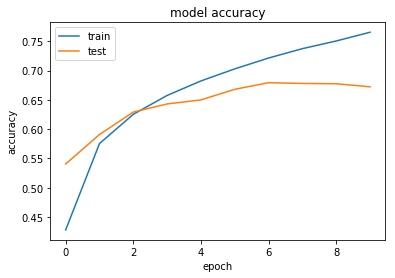

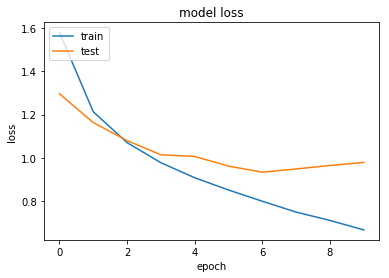

In [56]:
plot_accuracy(history_1)
plot_loss(history_1)

In [23]:
model_2 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_2.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_2.add(layers.MaxPooling2D((3, 3)))

# model_2.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_2.add(layers.Conv2D(64, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((3, 3)))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))

model_2.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [24]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_2 = os.path.dirname("training_2/training_2.ckpt")
cp_callback_2 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_2, save_weights_only=True)

history_2 = model_2.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_2])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.7375 - acc: 0.3582 - val_loss: 1.5040 - val_acc: 0.4568
Epoch 2/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.4517 - acc: 0.4772 - val_loss: 1.4036 - val_acc: 0.4978
Epoch 3/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.3484 - acc: 0.5157 - val_loss: 1.3479 - val_acc: 0.5217
Epoch 4/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.2788 - acc: 0.5463 - val_loss: 1.2928 - val_acc: 0.5376
Epoch 5/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.2154 - acc: 0.5706 - val_loss: 1.2669 - val_acc: 0.5477
Epoch 6/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.1648 - acc: 0.5892 - val_loss: 1.2357 - val_acc: 0.5631
Epoch 7/10
40000/40000 [==============================] - 43s 1ms/sample - loss: 1.1236 - acc: 0.6046 - val_loss: 1.

In [36]:
score_2 = model_2.evaluate(test_images, test_labels, verbose=1)
score_2_ = model_2.evaluate(validation_images, validation_labels, verbose=1)
score_2__ = model_2.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 14s 355us/sample - loss: 0.9687 - acc: 0.6629


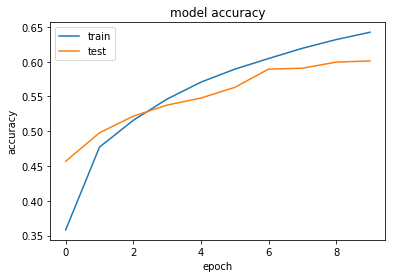

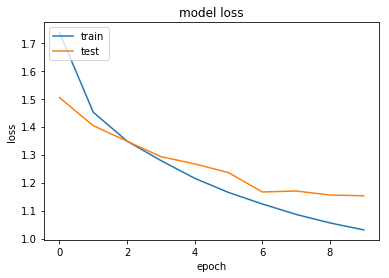

In [57]:
plot_accuracy(history_2)
plot_loss(history_2)

In [27]:
model_3 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))

# model_3.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [28]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_3 = os.path.dirname("training_3/training_3.ckpt")
cp_callback_3 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_3, save_weights_only=True)

history_3 = model_3.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_3])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 1.5137 - acc: 0.4557 - val_loss: 1.2753 - val_acc: 0.5496
Epoch 2/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 1.1696 - acc: 0.5879 - val_loss: 1.1067 - val_acc: 0.6100
Epoch 3/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 1.0293 - acc: 0.6404 - val_loss: 1.0202 - val_acc: 0.6430
Epoch 4/10
40000/40000 [==============================] - 53s 1ms/sample - loss: 0.9449 - acc: 0.6722 - val_loss: 1.0205 - val_acc: 0.6422
Epoch 5/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 0.8745 - acc: 0.6990 - val_loss: 0.9822 - val_acc: 0.6645
Epoch 6/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 0.8173 - acc: 0.7173 - val_loss: 0.9108 - val_acc: 0.6871
Epoch 7/10
40000/40000 [==============================] - 52s 1ms/sample - loss: 0.7666 - acc: 0.7355 - val_loss: 0.

In [37]:
score_3 = model_3.evaluate(test_images, test_labels, verbose=1)
score_3_ = model_3.evaluate(validation_images, validation_labels, verbose=1)
score_3__ = model_3.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 17s 413us/sample - loss: 0.5614 - acc: 0.8092


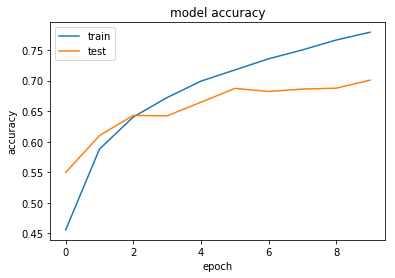

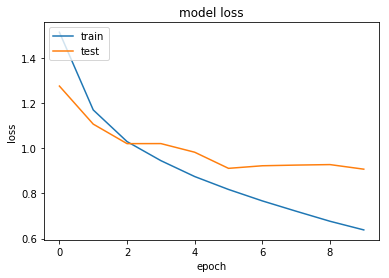

In [58]:
plot_accuracy(history_3)
plot_loss(history_3)

In [31]:
model_4 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))

# model_4.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dense(10, activation='softmax'))

model_4.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)              

In [32]:
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_4 = os.path.dirname("training_4/training_4.ckpt")
cp_callback_4 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_4, save_weights_only=True)

history_4 = model_4.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_4])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 60s 1ms/sample - loss: 1.5874 - acc: 0.4191 - val_loss: 1.2743 - val_acc: 0.5451
Epoch 2/10
40000/40000 [==============================] - 60s 1ms/sample - loss: 1.2124 - acc: 0.5696 - val_loss: 1.1621 - val_acc: 0.5966
Epoch 3/10
40000/40000 [==============================] - 59s 1ms/sample - loss: 1.0409 - acc: 0.6352 - val_loss: 1.0276 - val_acc: 0.6459
Epoch 4/10
40000/40000 [==============================] - 59s 1ms/sample - loss: 0.9240 - acc: 0.6789 - val_loss: 0.9569 - val_acc: 0.6610
Epoch 5/10
40000/40000 [==============================] - 59s 1ms/sample - loss: 0.8449 - acc: 0.7048 - val_loss: 0.9709 - val_acc: 0.6646
Epoch 6/10
40000/40000 [==============================] - 59s 1ms/sample - loss: 0.7791 - acc: 0.7291 - val_loss: 0.8950 - val_acc: 0.6918
Epoch 7/10
40000/40000 [==============================] - 59s 1ms/sample - loss: 0.7182 - acc: 0.7492 - val_loss: 0.

In [38]:
score_4 = model_4.evaluate(test_images, test_labels, verbose=1)
score_4_ = model_4.evaluate(validation_images, validation_labels, verbose=1)
score_4__ = model_4.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 18s 453us/sample - loss: 0.5105 - acc: 0.8229


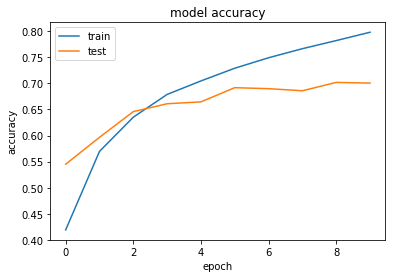

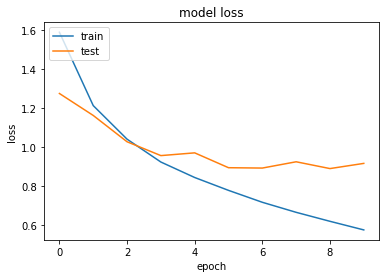

In [59]:
plot_accuracy(history_4)
plot_loss(history_4)

The best performing model is Model 4 :- due to 3 convolutional & maxpooling layers which is greater than other models with 2 convolution and maxpooling layers. More layers (to a certain limit, before it leads to overfitting) helps in extracting more features. 

In [39]:
## Choosing model 3 - to avoid negative dimension error with model 4

model_5 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_5.add(layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2), input_shape=(32, 32, 3)))
model_5.add(layers.MaxPooling2D((2, 2)))

# model_5.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_5.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2)))
model_5.add(layers.MaxPooling2D((2, 2)))

model_5.add(layers.Flatten())
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dense(10, activation='softmax'))

model_5.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [40]:
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_5 = os.path.dirname("training_5/training_5.ckpt")
cp_callback_5 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_5, save_weights_only=True)

history_5 = model_5.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_5])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 14s 346us/sample - loss: 1.8852 - acc: 0.3004 - val_loss: 1.6977 - val_acc: 0.3710
Epoch 2/10
40000/40000 [==============================] - 14s 354us/sample - loss: 1.6278 - acc: 0.4087 - val_loss: 1.5871 - val_acc: 0.4298
Epoch 3/10
40000/40000 [==============================] - 13s 333us/sample - loss: 1.5359 - acc: 0.4478 - val_loss: 1.4908 - val_acc: 0.4635
Epoch 4/10
40000/40000 [==============================] - 13s 336us/sample - loss: 1.4752 - acc: 0.4706 - val_loss: 1.4725 - val_acc: 0.4726
Epoch 5/10
40000/40000 [==============================] - 13s 336us/sample - loss: 1.4317 - acc: 0.4886 - val_loss: 1.4432 - val_acc: 0.4838
Epoch 6/10
40000/40000 [==============================] - 13s 331us/sample - loss: 1.3930 - acc: 0.5021 - val_loss: 1.4349 - val_acc: 0.4860
Epoch 7/10
40000/40000 [==============================] - 13s 330us/sample - loss: 1.3645 - acc: 0.5106 

In [41]:
score_5 = model_5.evaluate(test_images, test_labels, verbose=1)
score_5_ = model_5.evaluate(validation_images, validation_labels, verbose=1)
score_5__ = model_5.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 5s 120us/sample - loss: 1.2781 - acc: 0.5456


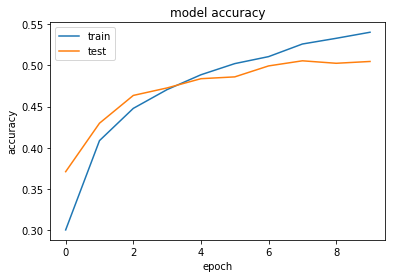

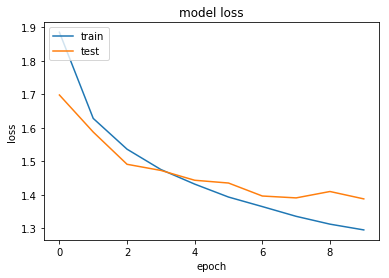

In [60]:
plot_accuracy(history_5)
plot_loss(history_5)

In [43]:
## Choosing model 4 - the best model obtained above

model_6 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_6.add(layers.Conv2D(32, (3, 3), activation='relu', padding='SAME', input_shape=(32, 32, 3)))
model_6.add(layers.MaxPooling2D((2, 2)))

# model_6.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_6.add(layers.Conv2D(64, (3, 3), padding='SAME', activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Conv2D(128, (3, 3), padding='SAME', activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Flatten())
model_6.add(layers.Dense(64, activation='relu'))
model_6.add(layers.Dense(10, activation='softmax'))

model_6.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)             

In [44]:
model_6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_6 = os.path.dirname("training_6/training_6.ckpt")
cp_callback_6 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_6, save_weights_only=True)

history_6 = model_6.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_6])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 96s 2ms/sample - loss: 1.4977 - acc: 0.4555 - val_loss: 1.1968 - val_acc: 0.5730
Epoch 2/10
40000/40000 [==============================] - 96s 2ms/sample - loss: 1.0369 - acc: 0.6368 - val_loss: 0.9278 - val_acc: 0.6815
Epoch 3/10
40000/40000 [==============================] - 96s 2ms/sample - loss: 0.8622 - acc: 0.6979 - val_loss: 0.8875 - val_acc: 0.6838
Epoch 4/10
40000/40000 [==============================] - 96s 2ms/sample - loss: 0.7552 - acc: 0.7381 - val_loss: 0.8077 - val_acc: 0.7187
Epoch 5/10
40000/40000 [==============================] - 96s 2ms/sample - loss: 0.6768 - acc: 0.7627 - val_loss: 0.8210 - val_acc: 0.7150
Epoch 6/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.6022 - acc: 0.7903 - val_loss: 0.7874 - val_acc: 0.7314
Epoch 7/10
40000/40000 [==============================] - 95s 2ms/sample - loss: 0.5322 - acc: 0.8139 - val_loss: 0.

In [45]:
score_6 = model_6.evaluate(test_images, test_labels, verbose=1)
score_6_ = model_6.evaluate(validation_images, validation_labels, verbose=1)
score_6__ = model_6.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 27s 679us/sample - loss: 0.2802 - acc: 0.9028


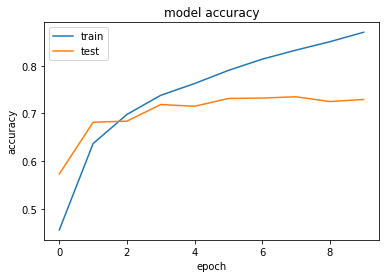

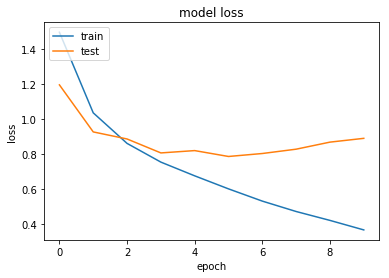

In [61]:
plot_accuracy(history_6)
plot_loss(history_6)

In [47]:
## Choosing model 3 - to avoid negative dimension error with model 4

model_7 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_7.add(layers.Conv2D(32, (3, 3), activation='relu', strides=(2, 2), padding='SAME', input_shape=(32, 32, 3)))
model_7.add(layers.MaxPooling2D((2, 2)))

# model_7.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_7.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='SAME'))
model_7.add(layers.MaxPooling2D((2, 2)))

model_7.add(layers.Flatten())
model_7.add(layers.Dense(64, activation='relu'))
model_7.add(layers.Dense(10, activation='softmax'))

model_7.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [48]:
model_7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_7 = os.path.dirname("training_7/training_7.ckpt")
cp_callback_7 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_7, save_weights_only=True)

history_7 = model_7.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_7])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 377us/sample - loss: 1.6727 - acc: 0.3894 - val_loss: 1.3941 - val_acc: 0.4901
Epoch 2/10
40000/40000 [==============================] - 15s 364us/sample - loss: 1.3502 - acc: 0.5116 - val_loss: 1.2616 - val_acc: 0.5428
Epoch 3/10
40000/40000 [==============================] - 15s 367us/sample - loss: 1.2284 - acc: 0.5628 - val_loss: 1.1826 - val_acc: 0.5769
Epoch 4/10
40000/40000 [==============================] - 15s 369us/sample - loss: 1.1464 - acc: 0.5919 - val_loss: 1.1261 - val_acc: 0.6007
Epoch 5/10
40000/40000 [==============================] - 15s 365us/sample - loss: 1.0860 - acc: 0.6136 - val_loss: 1.0902 - val_acc: 0.6172
Epoch 6/10
40000/40000 [==============================] - 15s 368us/sample - loss: 1.0351 - acc: 0.6328 - val_loss: 1.0983 - val_acc: 0.6127
Epoch 7/10
40000/40000 [==============================] - 15s 384us/sample - loss: 0.9942 - acc: 0.6466 

In [62]:
score_7 = model_7.evaluate(test_images, test_labels, verbose=1)
score_7_ = model_7.evaluate(validation_images, validation_labels, verbose=1)
score_7__ = model_7.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 5s 127us/sample - loss: 0.8371 - acc: 0.7036


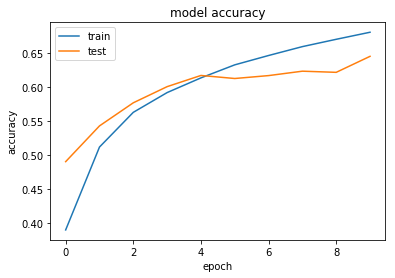

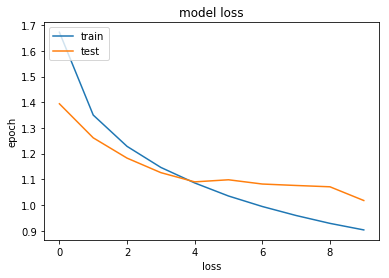

In [50]:
plot_accuracy(history_7)
plot_loss(history_7)

Model 6 has the highest test accuracy (72.91 %).

In [63]:
## Choosing model 6 - the best model obtained above

model_8 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_8.add(layers.Conv2D(32, (3, 3), activation='tanh', padding='SAME', input_shape=(32, 32, 3)))
model_8.add(layers.MaxPooling2D((2, 2)))

# model_8.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_8.add(layers.Conv2D(64, (3, 3), padding='SAME', activation='tanh'))
model_8.add(layers.MaxPooling2D((2, 2)))

model_8.add(layers.Conv2D(128, (3, 3), padding='SAME', activation='tanh'))
model_8.add(layers.MaxPooling2D((2, 2)))

model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='tanh'))
model_8.add(layers.Dense(10, activation='softmax'))

model_8.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2048)            

In [68]:
model_8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_8 = os.path.dirname("training_8/training_8.ckpt")
cp_callback_8 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_8, save_weights_only=True)

history_8 = model_8.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_8])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 1.3114 - acc: 0.5335 - val_loss: 1.0800 - val_acc: 0.6235
Epoch 2/10
40000/40000 [==============================] - 97s 2ms/sample - loss: 0.9638 - acc: 0.6644 - val_loss: 0.9272 - val_acc: 0.6766
Epoch 3/10
40000/40000 [==============================] - 97s 2ms/sample - loss: 0.8142 - acc: 0.7181 - val_loss: 0.9369 - val_acc: 0.6764
Epoch 4/10
40000/40000 [==============================] - 97s 2ms/sample - loss: 0.7000 - acc: 0.7595 - val_loss: 0.8997 - val_acc: 0.6919
Epoch 5/10
40000/40000 [==============================] - 97s 2ms/sample - loss: 0.5969 - acc: 0.7939 - val_loss: 0.9018 - val_acc: 0.6950
Epoch 6/10
40000/40000 [==============================] - 97s 2ms/sample - loss: 0.5090 - acc: 0.8255 - val_loss: 0.9249 - val_acc: 0.6930
Epoch 7/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 0.4298 - acc: 0.8525 - val_loss: 0.

In [69]:
score_8 = model_8.evaluate(test_images, test_labels, verbose=1)
score_8_ = model_8.evaluate(validation_images, validation_labels, verbose=1)
score_8__ = model_8.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 28s 700us/sample - loss: 0.1993 - acc: 0.9371


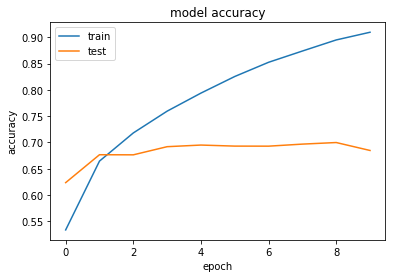

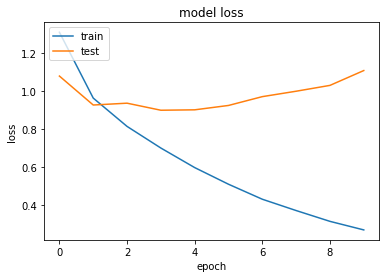

In [70]:
plot_accuracy(history_8)
plot_loss(history_8)

In [64]:
## Choosing model 6 - the best model obtained above

model_9 = models.Sequential()

# first convolution and max pooling layer ---  padding='valid' is zero padding by default

model_9.add(layers.Conv2D(32, (3, 3), activation='sigmoid', padding='SAME', input_shape=(32, 32, 3)))
model_9.add(layers.MaxPooling2D((2, 2)))

# model_9.add(layers.MaxPooling2D(pool_size=2))            // 2 will be used for both dimensions

# second convolution and max pooling layer
model_9.add(layers.Conv2D(64, (3, 3), padding='SAME', activation='sigmoid'))
model_9.add(layers.MaxPooling2D((2, 2)))

model_9.add(layers.Conv2D(128, (3, 3), padding='SAME', activation='sigmoid'))
model_9.add(layers.MaxPooling2D((2, 2)))

model_9.add(layers.Flatten())
model_9.add(layers.Dense(64, activation='sigmoid'))
model_9.add(layers.Dense(10, activation='softmax'))

model_9.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 2048)            

In [65]:
model_9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_9 = os.path.dirname("training_9/training_9.ckpt")
cp_callback_9 = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_9, save_weights_only=True)

history_9 = model_9.fit(train_images, train_labels, epochs=10, validation_data=(validation_images, validation_labels), callbacks=[cp_callback_9])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 2.0861 - acc: 0.2156 - val_loss: 1.7904 - val_acc: 0.3408
Epoch 2/10
40000/40000 [==============================] - 96s 2ms/sample - loss: 1.6471 - acc: 0.4078 - val_loss: 1.4940 - val_acc: 0.4593
Epoch 3/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 1.4697 - acc: 0.4726 - val_loss: 1.4148 - val_acc: 0.4878
Epoch 4/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 1.3785 - acc: 0.5046 - val_loss: 1.3497 - val_acc: 0.5155
Epoch 5/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 1.3059 - acc: 0.5325 - val_loss: 1.2979 - val_acc: 0.5302
Epoch 6/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 1.2444 - acc: 0.5558 - val_loss: 1.2667 - val_acc: 0.5474
Epoch 7/10
40000/40000 [==============================] - 98s 2ms/sample - loss: 1.1798 - acc: 0.5805 - val_loss: 1.

In [66]:
score_9 = model_9.evaluate(test_images, test_labels, verbose=1)
score_9_ = model_9.evaluate(validation_images, validation_labels, verbose=1)
score_9__ = model_9.evaluate(train_images, train_labels, verbose=1)

40000/40000 [==============================] - 28s 705us/sample - loss: 0.9376 - acc: 0.6708


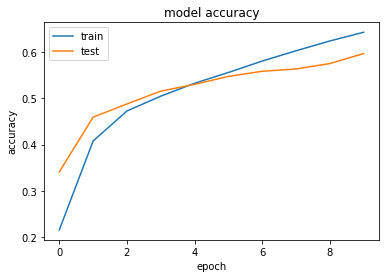

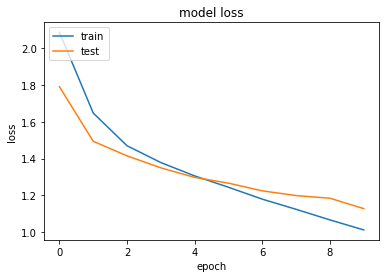

In [67]:
plot_accuracy(history_9)
plot_loss(history_9)

In [74]:
import pandas as pd
import numpy as np

columns = []
columns.append('#of trainable parameters')
columns.append('Training Time (seconds)')
columns.append('Training Accuracy (%)')
columns.append('Validation Accuracy (%)')
columns.append('Test Accuracy (%)')


df = pd.DataFrame({'Model': np.linspace(1, 9, 9)})
df = pd.concat([df, pd.DataFrame(np.random.randn(9, 5), columns=columns)],
               axis=1)

df.iloc[0, 1] = 156810
df.iloc[0, 2] = 79.4
df.iloc[0, 3] = 79.25
df.iloc[0, 4] = 67.24
df.iloc[0, 5] = 67.44

df.iloc[1, 1] = 58506
df.iloc[1, 2] = 43
df.iloc[1, 3] = 66.29
df.iloc[1, 4] = 60.11
df.iloc[1, 5] = 59.40

df.iloc[2, 1] = 167562
df.iloc[2, 2] = 52.6
df.iloc[2, 3] = 80.92
df.iloc[2, 4] = 70.06
df.iloc[2, 5] = 69.62

df.iloc[3, 1] = 126730
df.iloc[3, 2] = 59.3
df.iloc[3, 3] = 82.29
df.iloc[3, 4] = 70.06
df.iloc[3, 5] = 69.60

df.iloc[4, 1] = 24202
df.iloc[4, 2] = 13.2
df.iloc[4, 3] = 54.56
df.iloc[4, 4] = 50.47
df.iloc[4, 5] = 50.59

df.iloc[5, 1] = 225034
df.iloc[5, 2] = 95.4
df.iloc[5, 3] = 90.28
df.iloc[5, 4] = 72.94
df.iloc[5, 5] = 72.91

df.iloc[6, 1] = 36490
df.iloc[6, 2] = 15
df.iloc[6, 3] = 70.36
df.iloc[6, 4] = 64.54
df.iloc[6, 5] = 64.44

df.iloc[7, 1] = 225034
df.iloc[7, 2] = 97.50
df.iloc[7, 3] = 93.71
df.iloc[7, 4] = 68.47
df.iloc[7, 5] = 68.71

df.iloc[8, 1] = 225034
df.iloc[8, 2] = 97.60
df.iloc[8, 3] = 67.08
df.iloc[8, 4] = 59.68
df.iloc[8, 5] = 60.11

df

,Model,#of trainable parameters,Training Time (seconds),Training Accuracy (%),Validation Accuracy (%),Test Accuracy (%)
0,1.0,156810.0,79.4,79.25,67.24,67.44
1,2.0,58506.0,43.0,66.29,60.11,59.40
2,3.0,167562.0,52.6,80.92,70.06,69.62
3,4.0,126730.0,59.3,82.29,70.06,69.60
4,5.0,24202.0,13.2,54.56,50.47,50.59
5,6.0,225034.0,95.4,90.28,72.94,72.91
6,7.0,36490.0,15.0,70.36,64.54,64.44
7,8.0,225034.0,97.5,93.71,68.47,68.71
8,9.0,225034.0,97.6,67.08,59.68,60.11
